## SELF JOIN  
: 조인의 대상과 목표 테이블이 동일하다. (자기 자신이 자기 자신에 조인함)  
예) 조직도 테이블: 이부장의 내선 번호를 알려면 -> EMP열과 Manager열을 JOIN
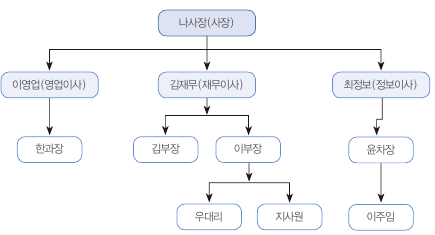
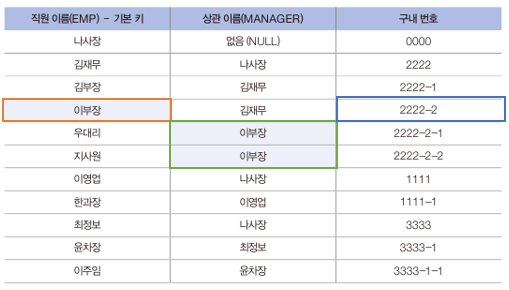
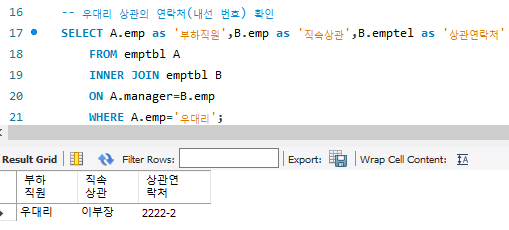
- 문법은 INNER JOIN과 같으나, SELF JOIN은 동일한 테이블이 들어간다.
- 조건: 하나의 테이블에서 같은 데이터가 존재할 때, SELF JOIN이 가능해 진다. 다만 데이터가 가진 의미가 달라야 한다.

In [ ]:
# NEW SAMPLE
USE sqldb3;
CREATE TABLE empTbl (emp CHAR(3), manager CHAR(3), empTel VARCHAR(8));

INSERT INTO empTbl VALUES('나사장',NULL,'0000');
INSERT INTO empTbl VALUES('김재무','나사장','2222');
INSERT INTO empTbl VALUES('김부장','김재무','2222-1');
INSERT INTO empTbl VALUES('이부장','김재무','2222-2');
INSERT INTO empTbl VALUES('우대리','이부장','2222-2-1');
INSERT INTO empTbl VALUES('지사원','이부장','2222-2-2');
INSERT INTO empTbl VALUES('이영업','나사장','1111');
INSERT INTO empTbl VALUES('한과장','이영업','1111-1');
INSERT INTO empTbl VALUES('최정보','나사장','3333');
INSERT INTO empTbl VALUES('윤차장','최정보','3333-1');
INSERT INTO empTbl VALUES('이주임','윤차장','3333-1-1');

## UNION/UNION ALL/NOT IN/IN
1. UNION(합집합): 두 쿼리의 결과를 행으로 합치는 것을 말하며, 중복되는 데이터를 제거(DISTINCT)한다.
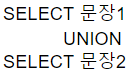
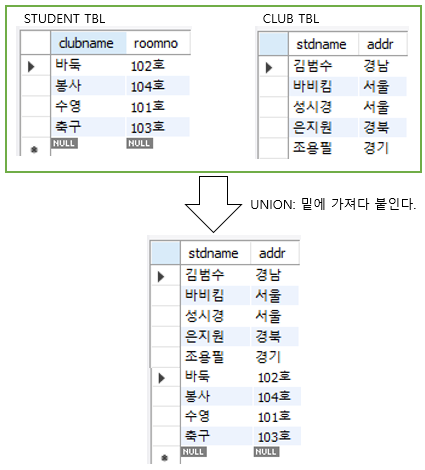
- 조건: Column을 기준으로 합치기 때문에, column(행)의 데이터 타입이 일치해야 한다.
- 열 이름은 문장1을 기준으로 한다.
2. UNION ALL: 두 쿼리의 결과를 행으로 합치는 것을 말하며, 중복되는 데이터를 모두 출력한다.
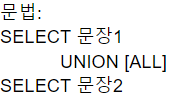
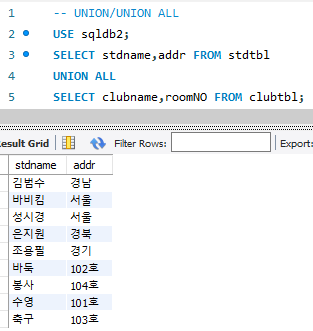
3. NOT IN
- A NOT IN B: A(첫번째 테이블) 중에서 B에 해당되는 것 제외 = 중복되는 것 제거
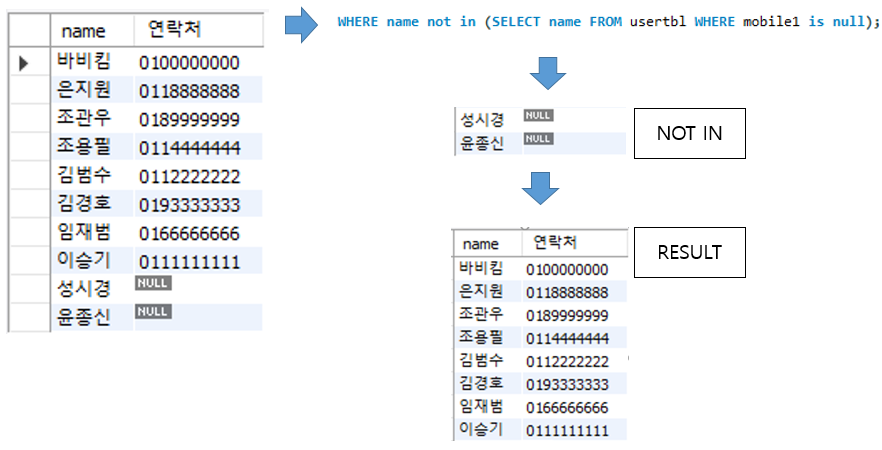  
예) sqldb에서 전화번호가 없는 사람을 제외하고 모두 출력해라.
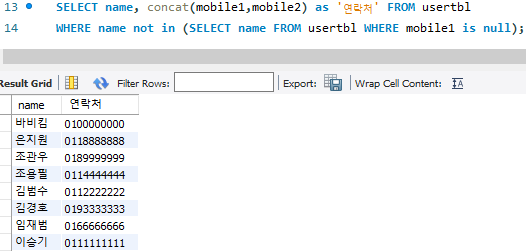
4. IN
- A IN B: A(첫번째 테이블) 중에서 B에 해당되는것'만' 출력 = 중복되는거만 가져오기  
예) sqldb에서 전화번호가 없는 사람을 제외하고 모두 출력해라.
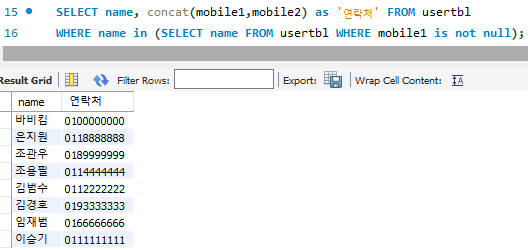

## SQL 프로그래밍  
: 스토어드 프로시져/스토어드 함수, 커서, 트리거
1. 스토어드 프로시져 문법:
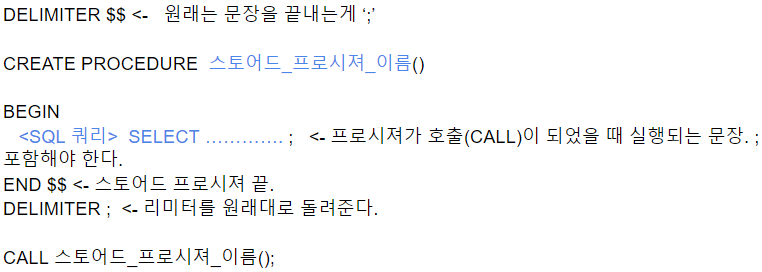
- 사용자 함수와 비슷하기 때문에 반드시 실행을 해주어야 한다. -> CALL 프로시져_이름();
- DELIMITER: 원래는 문장을 ' ; '으로 끝내는데, BEGIN-END 사이에 SQL 쿼리 또한 ' ; '로 끝나기에 만일 DELIMITER를 사용하지 않으면 SQL 쿼리에서 실행이 끝나 ERROR가 발생하게 된다. 따라서, ' ; '를 리미터로 사용할 수 없기 때문에 다른 특수 문자인 ' // '등을 이용하여 리미터를 설정해야 한다.
- DELIMITER 구분자 : $$, &&, @@, // 등 -> 2개 연달아 쓰는 이유: 혹시나 사용중인 다른 기호와 중복될까봐 2개 연속 사용
- 변수: 만일 GLOBAL 변수를 사용할 시 '@변수'를 사용해야 하는데, LOCAL 변수를 사용할 시 '변수'로 @을 사용하지 않는다.
2. IF/ELSE
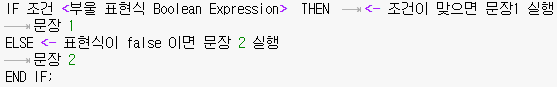  
예) 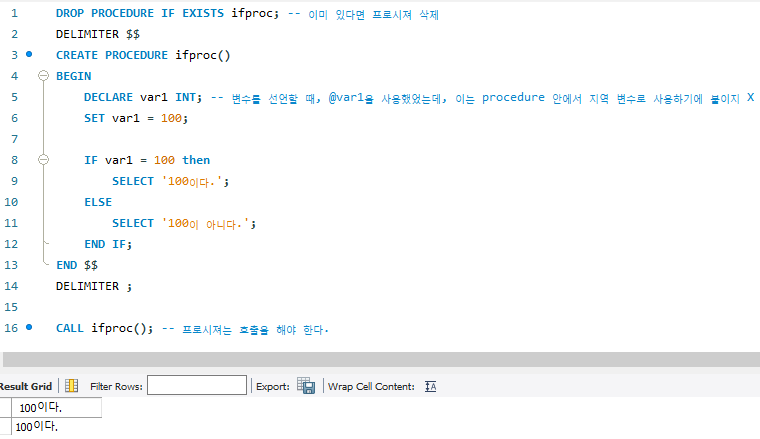

실습) Employees 테이블에서 Emp_no가 10001인 사원의 입사일이 30년이 넘었는지 확인해 보아라.  
① Emp_no가 10001의 근속년수부터 구하기  
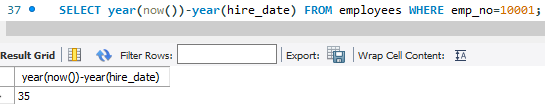
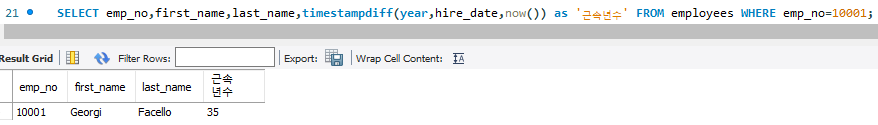
② Emp_no가 10001인 사원의 입사일이 30년이 넘었는지 확인  
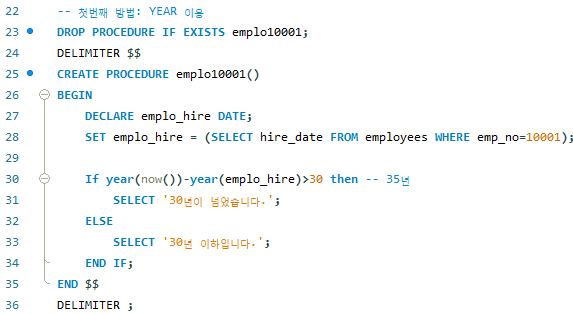
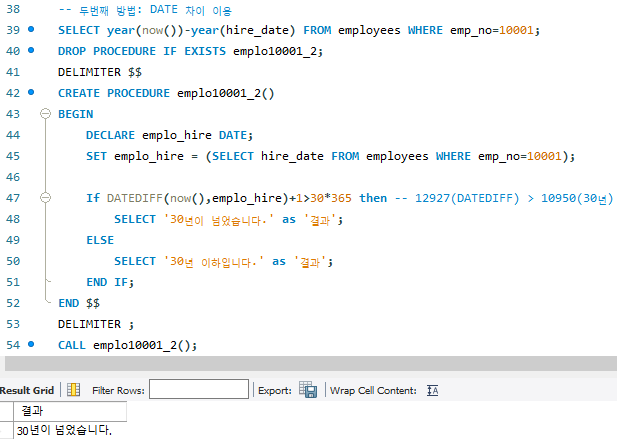
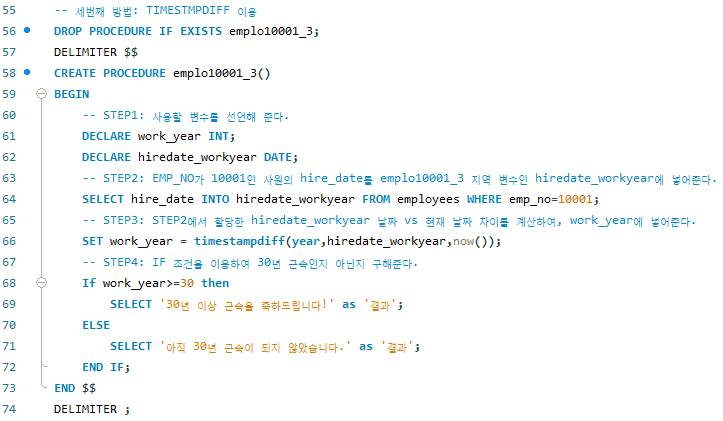
3. IF/ELSEIF/ELSE: 3가지 이상의 조건을 야기할 때 IF와 ELSE 사이에 ELSEIF를 사용한다.
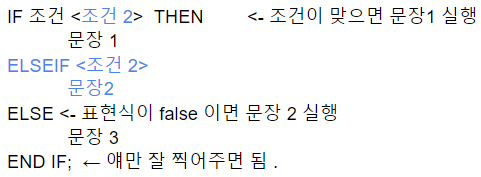
- IF절에 ELSEIF와 ELSE는 반드시 포함되어야 하는 것은 아니다. 'END IF'만 반드시 넣어준다.
- IF/ELSEIF/ELSE를 CASE문으로 표현
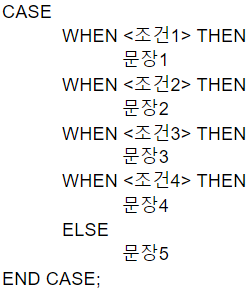
- 만일 만족되는 조건이 여러 개면(충족되는 조건이 겹치면), 위에서 먼저 만족되는 문장이 실행된다.

QUIZ) 구매 테이블의 구매액이 1500원 이상인 고객은 “최우수 고객”, 1000원 이상인 고객은 ‘우수고객’, 1원 이상인 고객은 ‘일반고객’으로, 구매전적이 없는 고객은 “유령고객” 이라고 출력하자.


In [ ]:
# 스토어드 프로시져
DELIMITER $$
CREATE PROCEDURE  스토어드_프로시져_이름()
BEGIN
   <SQL 쿼리>
END $$
DELIMITER ;

CALL 스토어드_프로시져_이름();

# IF/ELSE
IF 조건 <부울 표현식 Boolean Expression>  THEN  	<- 조건이 맞으면 문장1 실행
	문장 1
ELSE
	문장 2
END IF;

## 오류처리

- 액션: 오류가 발생하면 하는 행동 (두가지 행동: CONTINUE/EXIT)  
① CONTINUE: 오류가 발생하면 그것을 무시하고 실행하던 것을 지속하기 = ERROR가 발생해도 처리할 문장이 발동  
② EXIT: proc를 꺼버린다. (python의 break와 같은 의미)
- 오류 조건: 어떤 오류를 처리할 것인가? 지정하기 ->  오류 조건: https://java119.tistory.com/95
- 지정할 문장: 문장이 하나일 경우 그냥 적으면 되나, 여러 개일 경우 DELIMITER를 이용하여 BEGIN-END로 묶어준다.
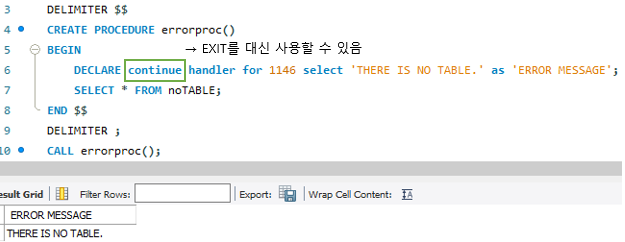
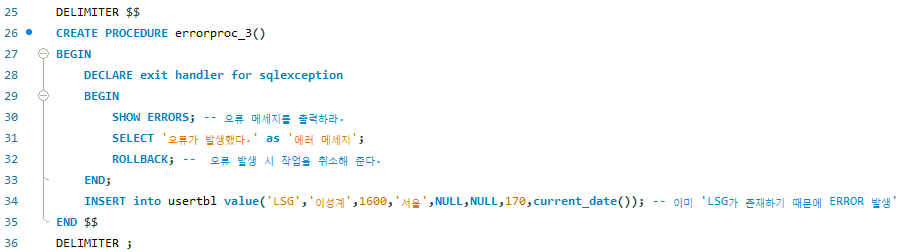

## 동적 SQL

- PREPARE : SQL문을 '준비'만 해둔다.
- EXECUTE : 준비된 SQL문을 '실행'해준다.
- DEALLOCATE: 준비한 SQL문을 해지한다.
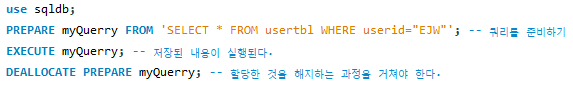

## WHILE/ITERATE/LEAVE
1. WHILE: 조건(부울식)이 참일 때 계속 반복
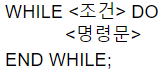
- IF와 같이 단독으로는 실행이 되지 않으며, PROCEDURE안에 넣어서 실행해야 한다.  
예) 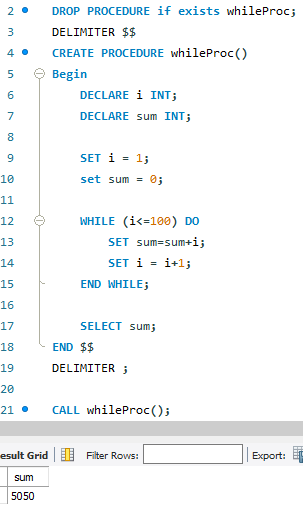
2. ITERATE(한바퀴_실행함): 파이썬에서 CONTINUE와 같다.
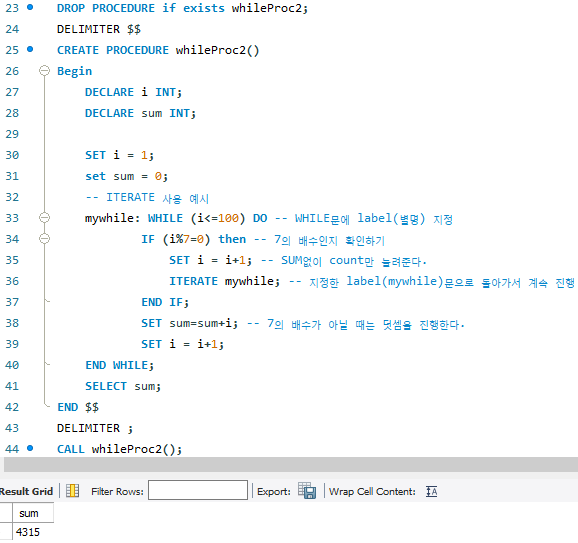
3. LEAVE: 파이썬에서 BREAK와 같다.
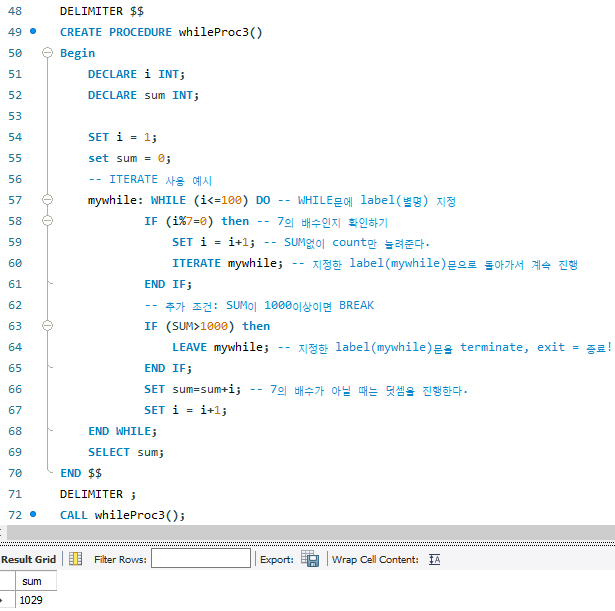